In [13]:
import cv2
from matplotlib import pyplot as plt
import imutils
import easyocr
import numpy as np

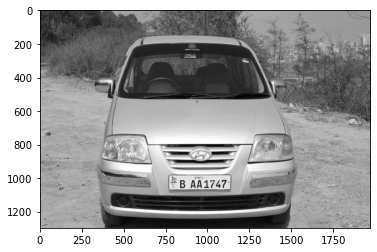

In [44]:
image = cv2.imread('car1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11,17,17)
edged = cv2.Canny(bfilter, 30, 300)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [61]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:15]

In [62]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [63]:
location

array([[[1172,  839]],

       [[1122,  859]],

       [[1026,  861]],

       [[1018,  844]]], dtype=int32)

In [64]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)

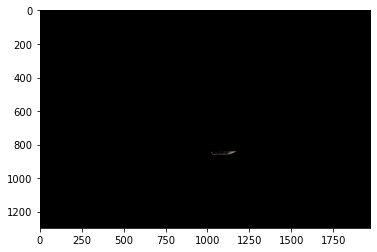

In [65]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))